# Funcionamiento de YOLO (You Only Look Once)



YOLO ("You Only Look Once") es una familia de algoritmos de visión por computadora diseñados para la detección de objetos en imágenes y videos en tiempo real. A diferencia de otros métodos de detección, YOLO procesa la imagen completa en una sola pasada por la red neuronal, logrando alta precisión y velocidad. Esta capacidad la hace ideal para aplicaciones como vigilancia, robótica, conducción autónoma y más.

In [1]:
#requirements
!pip install gitpython>=3.1.30
!pip install matplotlib>=3.3
!pip install numpy>=1.23.5
!pip install opencv-python>=4.1.1
!pip install pillow>=10.3.0
!pip install psutil
!pip install PyYAML>=5.3.1
!pip install requests>=2.32.0
!pip install scipy>=1.4.1
!pip install thop>=0.1.1
!pip install torch>=1.8.0
!pip install torchvision>=0.9.0
!pip install tqdm>=4.64.0
!pip install ultralytics>=8.2.34
!pip install pandas>=1.1.4
!pip install seaborn>=0.11.0
!pip install setuptools>=65.5.1
!pip install filterpy
!pip install scikit-image
!pip install lap

In [2]:
#Montamos el drive al colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Principios Básicos

1. División de la Imagen

YOLO divide la imagen de entrada en una cuadrícula de celdas. Cada celda es responsable de predecir:

La presencia de un objeto dentro de su área.

Las coordenadas del objeto (si existe).

La clase del objeto detectado.

2. Predicciones Simultáneas

Cada celda produce un conjunto de predicciones que incluye:

Bounding boxes: Coordenadas para las cajas delimitadoras.

Confianza: Qué tan probable es que la caja contenga un objeto.

Clases: Probabilidades de pertenencia a cada clase.



Arquitectura de YOLO

YOLO utiliza una red neuronal convolucional (CNN) optimizada para realizar detección de objetos. Aquí están los componentes clave:

1. Backbone

El backbone es una CNN preentrenada, como Darknet, que extrae características importantes de la imagen. En las versiones más recientes, como YOLOv5 y YOLOv8, se han adoptado arquitecturas más ligeras y rápidas.

2. Cabeza de Predicción

Se encarga de generar las predicciones finales basadas en las características extraídas. Incluye:

Coordenadas de las bounding boxes.

Confianza para cada predicción.

Distribuciones de probabilidad para cada clase.



Proceso de Detección

Entrada: Una imagen de tamaño fijo (e.g., 640x640).

Extracción de Características: El backbone analiza la imagen y extrae características relevantes.

Predicciones Iniciales: Se generan múltiples predicciones para cada celda de la cuadrícula.

Filtrado de Predicciones:

Se aplica un umbral de confianza para descartar predicciones irrelevantes.

Se utiliza la supresión no máxima (NMS) para eliminar cajas redundantes.

Salida: Coordenadas de bounding boxes, etiquetas de clase y puntajes de confianza.

Ventajas y Desventajas

Ventajas

Velocidad: Ideal para aplicaciones en tiempo real.

Simplicidad: Todo el proceso se realiza en una sola pasada.

Alta Precisión: Especialmente para objetos grandes.

Desventajas

Dificultad con Objetos Pequeños: La cuadrícula puede no capturar bien detalles pequeños.

Sensibilidad a la Resolución: Requiere imágenes de entrada de tamaño específico.

Versiones de YOLO

1. YOLOv1

Introdujo el enfoque "You Only Look Once".

Limitado en precisión debido a la simplicidad de su arquitectura.

2. YOLOv2 y YOLOv3

Mejoras en la arquitectura y uso de anclas para mejorar la detección de objetos pequeños.

3. YOLOv4

Introdujo técnicas modernas como Mish Activation y CSPDarknet.

4. YOLOv5

Enfocado en la facilidad de uso y soporte extensivo para frameworks como PyTorch.

5. YOLOv8

Última versión con un enfoque más modular, multitarea (detección, segmentación, clasificación) y soporte nativo para exportación a formatos como ONNX y TensorRT.

##Propósito General

Descarga un conjunto de datos desde Roboflow.
Configura un modelo YOLOv8 preentrenado.
Entrena el modelo con las imágenes y etiquetas del dataset.
Genera estadísticas y gráficos del entrenamiento.

In [7]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/Pothole/data.yaml epochs=45 imgsz=640 plots=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Pothole/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [22]:
import os

HOME = os.getcwd()

In [38]:
!ls /content/runs/detect/train15

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1733085177.6774d31a74ad.13600.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1050.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1051.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1052.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


In [39]:
from google.colab import files
# Download the detect folder after training
!zip -r detect.zip /content/runs/detect/train15

updating: content/runs/detect/train15/ (stored 0%)
updating: content/runs/detect/train15/train_batch2.jpg (deflated 1%)
updating: content/runs/detect/train15/events.out.tfevents.1733085177.6774d31a74ad.13600.0 (deflated 92%)
updating: content/runs/detect/train15/train_batch1050.jpg (deflated 4%)
updating: content/runs/detect/train15/val_batch2_labels.jpg (deflated 6%)
updating: content/runs/detect/train15/labels.jpg (deflated 30%)
updating: content/runs/detect/train15/val_batch0_pred.jpg (deflated 5%)
updating: content/runs/detect/train15/train_batch0.jpg (deflated 1%)
updating: content/runs/detect/train15/R_curve.png (deflated 17%)
updating: content/runs/detect/train15/P_curve.png (deflated 17%)
updating: content/runs/detect/train15/PR_curve.png (deflated 19%)
updating: content/runs/detect/train15/val_batch1_labels.jpg (deflated 5%)
updating: content/runs/detect/train15/train_batch1051.jpg (deflated 6%)
updating: content/runs/detect/train15/results.png (deflated 7%)
updating: content/

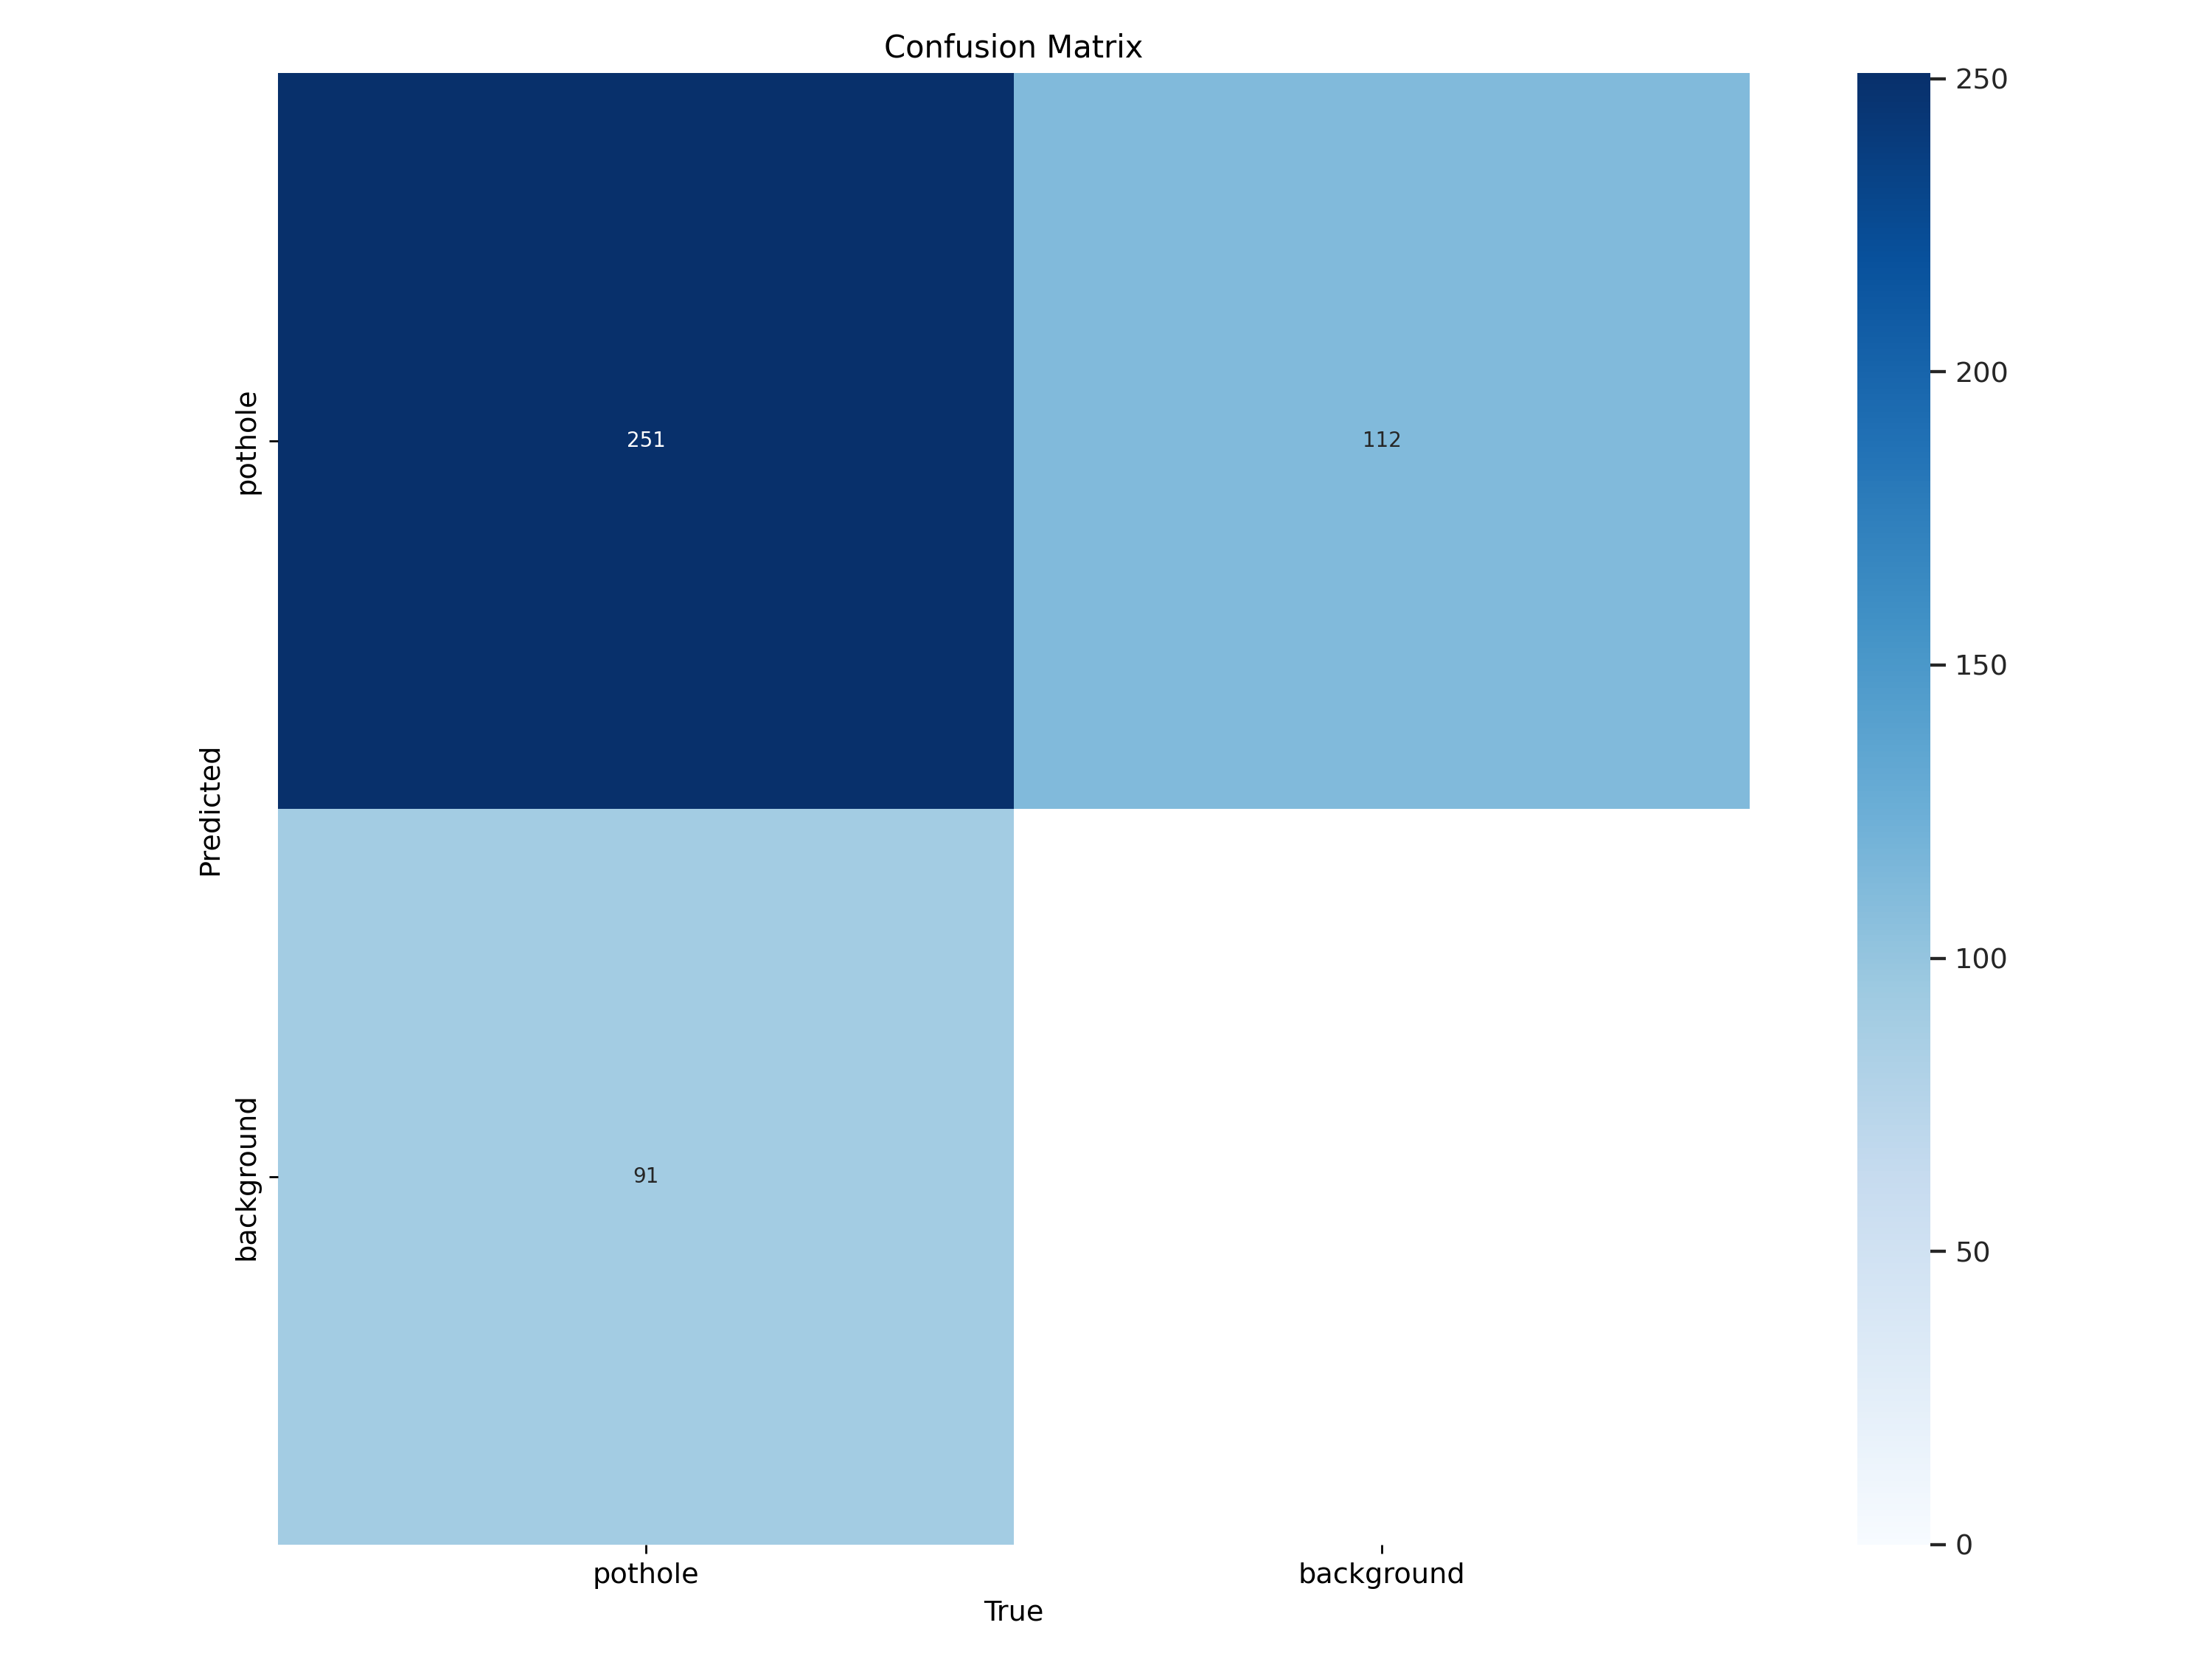

In [23]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train15/confusion_matrix.png', width=600)

/content


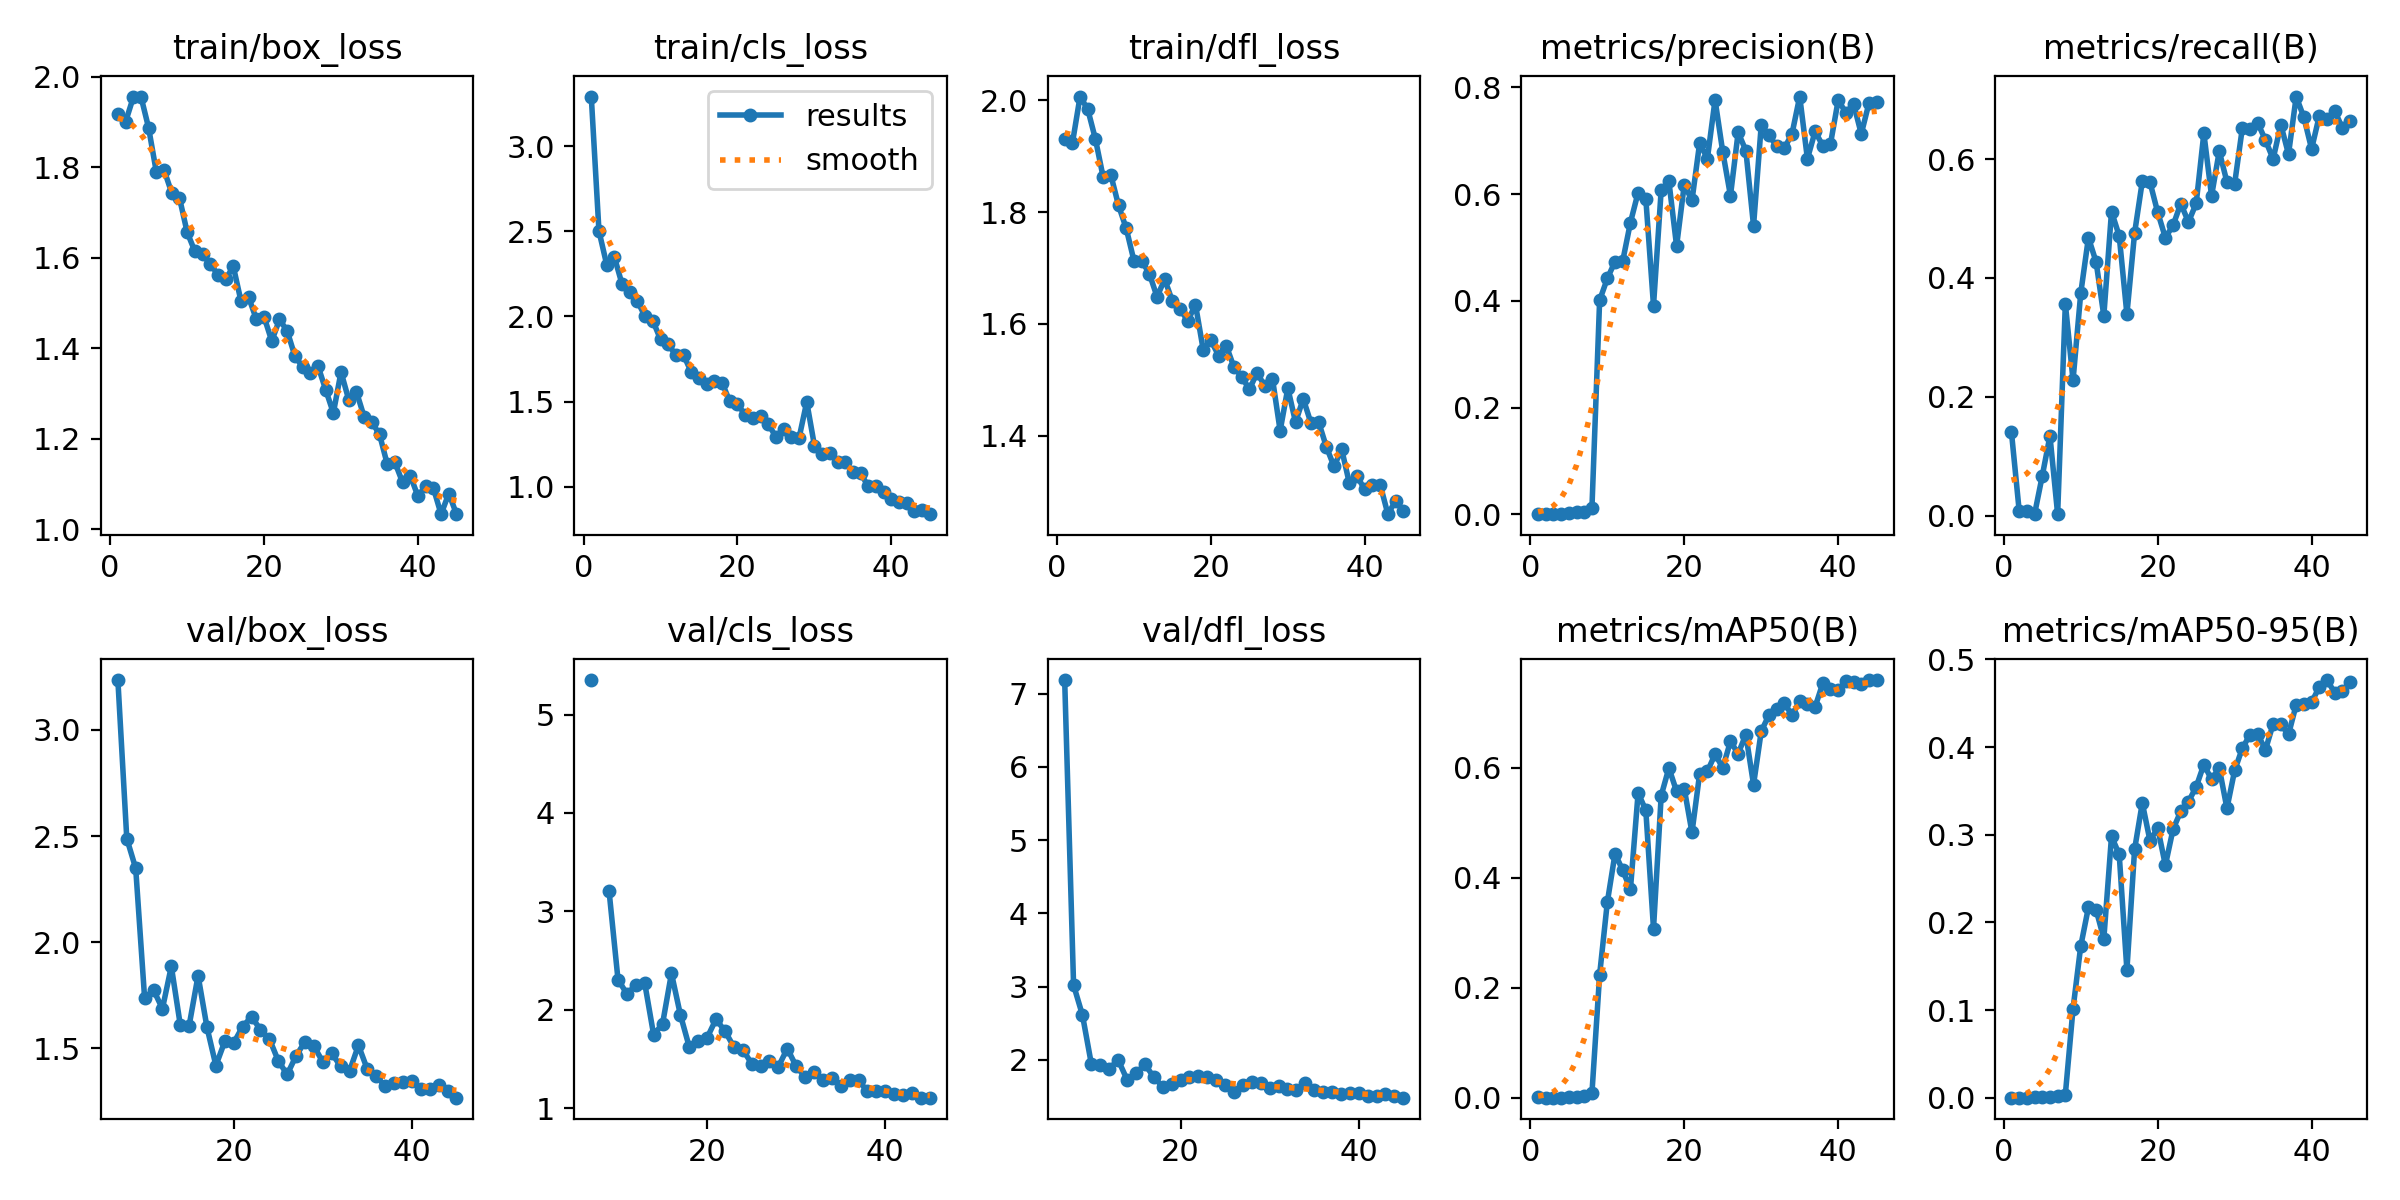

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train15/results.png', width=600)

/content


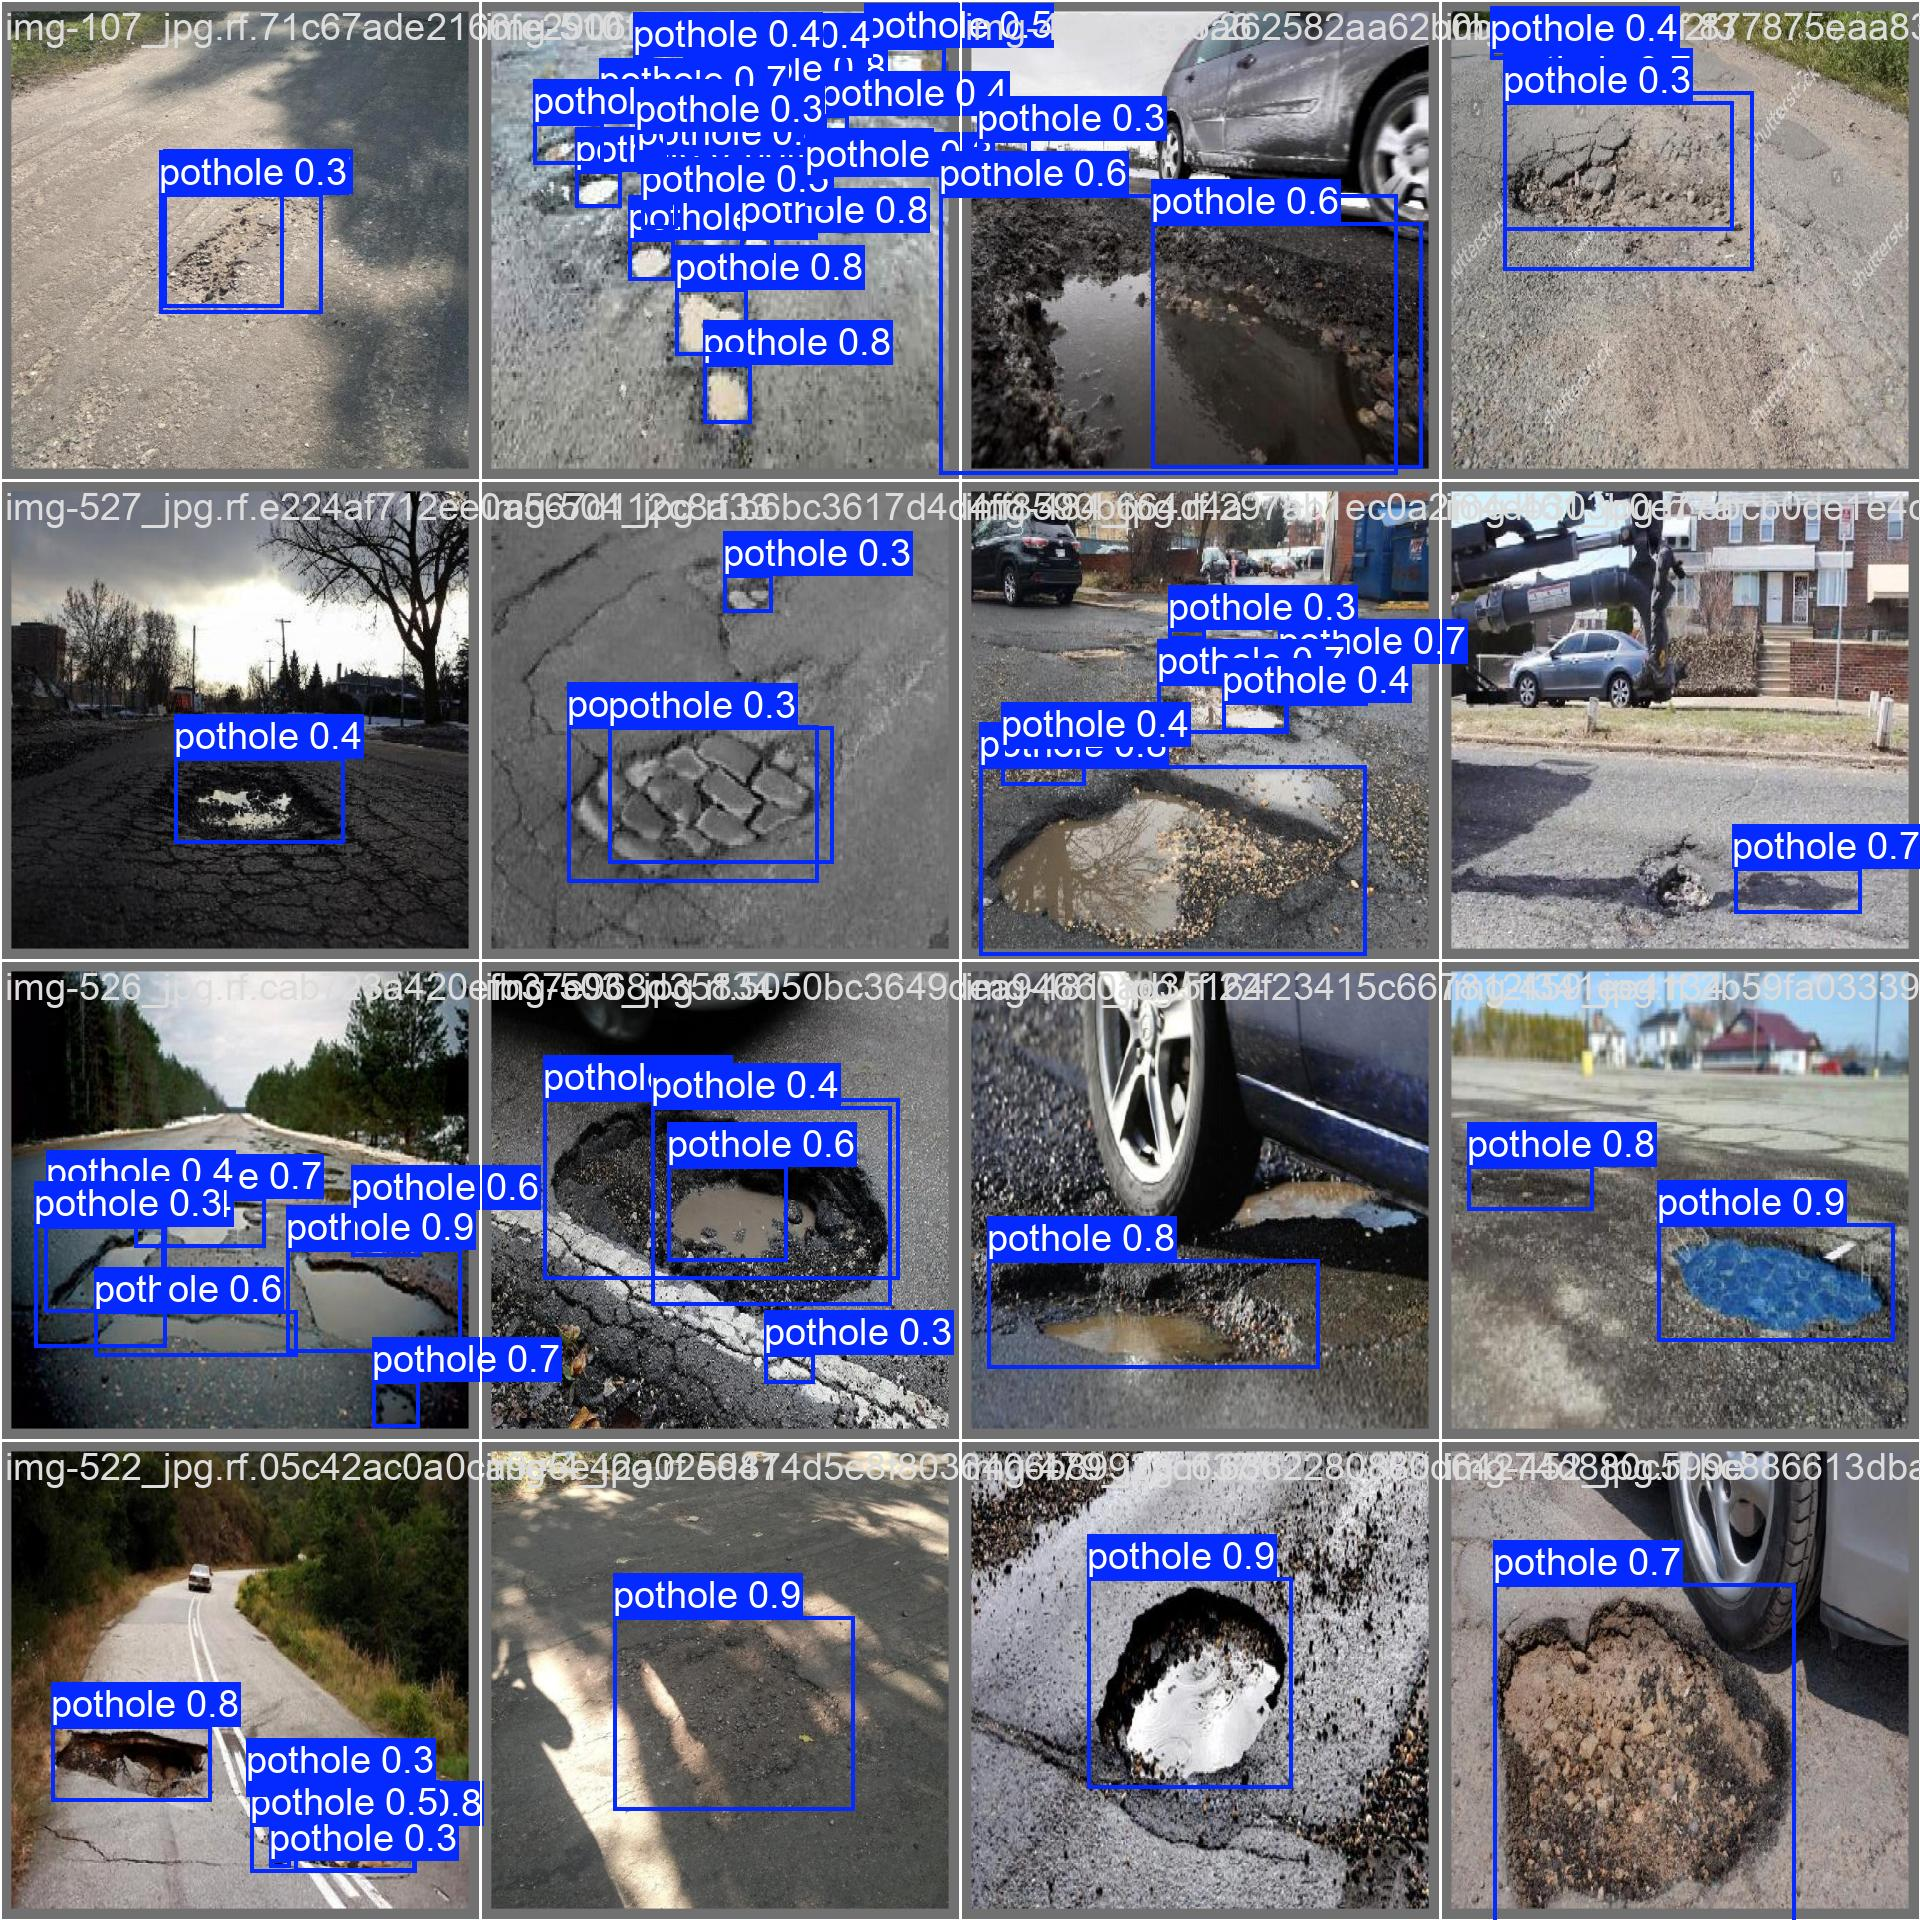

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train15/val_batch0_pred.jpg', width=600)

In [27]:
#Validar modelo

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train15/weights/best.pt data=/content/drive/MyDrive/Pothole/data.yaml

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/Pothole/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:06<00:00,  1.41it/s]
                   all        133        342      0.769      0.667      0.756      0.477
Speed: 0.3ms preprocess, 36.3ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [40]:
# Download the detect folder after train
!zip -r detect.zip {HOME}/runs/detect/val

print("detect folder zipped as detect.zip")


updating: content/runs/detect/val/ (stored 0%)
updating: content/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
updating: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
updating: content/runs/detect/val/R_curve.png (deflated 17%)
updating: content/runs/detect/val/P_curve.png (deflated 17%)
updating: content/runs/detect/val/PR_curve.png (deflated 18%)
updating: content/runs/detect/val/val_batch1_labels.jpg (deflated 4%)
updating: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/val/confusion_matrix_normalized.png (deflated 37%)
updating: content/runs/detect/val/val_batch2_pred.jpg (deflated 5%)
updating: content/runs/detect/val/F1_curve.png (deflated 17%)
updating: content/runs/detect/val/confusion_matrix.png (deflated 40%)
updating: content/runs/detect/val/val_batch1_pred.jpg (deflated 4%)
detect folder zipped as detect.zip


In [35]:
#Inferencia con el modelo
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train15/weights/best.pt conf=0.25 source= /content/drive/MyDrive/Pothole/test/images save=True



/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs

image 1/67 /content/drive/MyDrive/Pothole/test/images/img-106_jpg.rf.a6cb5366859b4d5c9d1fcc0af6a5c1b5.jpg: 640x640 1 pothole, 62.6ms
image 2/67 /content/drive/MyDrive/Pothole/test/images/img-124_jpg.rf.a00e6351da1cb6f622a39ef36657c540.jpg: 640x640 5 potholes, 62.6ms
image 3/67 /content/drive/MyDrive/Pothole/test/images/img-146_jpg.rf.ca0dcb84640b60cd337dde07d3e1db32.jpg: 640x640 2 potholes, 62.6ms
image 4/67 /content/drive/MyDrive/Pothole/test/images/img-171_jpg.rf.6f5f59b8fcf9edfa5760e0abb22dcb81.jpg: 640x640 1 pothole, 62.6ms
image 5/67 /content/drive/MyDrive/Pothole/test/images/img-175_jpg.rf.59795b56b181b1977ccd6e2b5be20a8d.jpg: 640x640 3 potholes, 62.8ms
image 6/67 /content/drive/MyDrive/Pothole/test/images/img-177_jpg.rf.f934fb23b5993f8e0474e89fbeaaa26c.jpg: 640x640 1 pothole, 62.6ms
image 7/67 /content/dri

In [36]:
# Download the detect folder after predict
!zip -r detect.zip {HOME}/runs/detect/predict

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/img-287_jpg.rf.ee70410d9791c60dd3da3ebfe385ca37.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-596_jpg.rf.2f49c229f00333fd2375b6bde1d16594.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-356_jpg.rf.0ae4e36adaa42261510f9eea3686bf9e.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-463_jpg.rf.228cb5e4ed2d1d5317a452a3292cd1b9.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-499_jpg.rf.4e856addad713c926ec0c5b198956fba.jpg (deflated 4%)
  adding: content/runs/detect/predict/img-106_jpg.rf.a6cb5366859b4d5c9d1fcc0af6a5c1b5.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-33_jpg.rf.d8e1d8f51a14dc2cbdbb796e34aa6fe0.jpg (deflated 4%)
  adding: content/runs/detect/predict/img-584_jpg.rf.d4e6e3d58c8c914dfb9d2e766cb14b10.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-586_jpg.rf.dfa9954b46338f3e20e15f9cad275fb9.jpg (deflated 5%)
  adding: cont

In [41]:
#Descargamos el modelo que mandaremos a produccion
from google.colab import files

# Download the best.pt model file
files.download(f'{HOME}/runs/detect/train15/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>